## ⚽ UEFA Insights – 1. Win Probability Accuracy (Per Stage/Per Team)

This notebook visualizes how accurately the prediction model performed across different tournament stages of UEFA Championship, seasons 2020, 2021, 2022.  
**Data source:** UEFA match data provided in DataCamp's Data Sources repository for DataLab projects hosted on Snowflake.

In [5]:
-- Evaluates how accurately the prediction model performed across different tournament stages (2020–2022).
-- Output is saved in a data frame 'win_probability_accuracy_stage' for later visualization.

WITH all_matches AS (
    SELECT * FROM SOCCER.TBL_UEFA_2020
    UNION ALL
    SELECT * FROM SOCCER.TBL_UEFA_2021
    UNION ALL
    SELECT * FROM SOCCER.TBL_UEFA_2022
),
match_results AS (
  SELECT
	STAGE,
    CASE
      WHEN PREDICTION_TEAM_HOME_WIN > PREDICTION_DRAW AND PREDICTION_TEAM_HOME_WIN > PREDICTION_TEAM_AWAY_WIN THEN 'HOME_WIN'
      WHEN PREDICTION_TEAM_AWAY_WIN > PREDICTION_TEAM_HOME_WIN AND PREDICTION_TEAM_AWAY_WIN > PREDICTION_DRAW THEN 'AWAY_WIN'
      ELSE 'DRAW'
    END AS PREDICTED_RESULT,

    CASE
      WHEN TEAM_HOME_SCORE > TEAM_AWAY_SCORE THEN 'HOME_WIN'
      WHEN TEAM_HOME_SCORE < TEAM_AWAY_SCORE THEN 'AWAY_WIN'
      ELSE 'DRAW'
    END AS ACTUAL_RESULT
  FROM all_matches
),
accuracy_check AS (
  SELECT *,
         CASE WHEN PREDICTED_RESULT = ACTUAL_RESULT THEN 1 ELSE 0 END AS IS_CORRECT
  FROM match_results
)
SELECT 
  STAGE, 	
  COUNT(*) AS TOTAL_MATCHES,
  SUM(IS_CORRECT) AS CORRECT_PREDICTIONS,
  ROUND(SUM(IS_CORRECT) / COUNT(*), 3) AS ACCURACY
FROM accuracy_check
GROUP BY STAGE;

,STAGE,TOTAL_MATCHES,CORRECT_PREDICTIONS,ACCURACY
0,Final,4,0,0.000
1,Group stage: Matchday 4,48,24,0.500
2,Group stage: Matchday 6,42,13,0.310
3,Quarter-finals second leg,12,6,0.500
4,Semi-finals second leg,6,0,0.000
5,Round of 16 second leg,24,9,0.375
6,Quarter-finals first leg,12,4,0.333
7,Group stage: Matchday 1,48,14,0.292
8,Group stage: Matchday 5,48,17,0.354
9,Group stage: Matchday 6,6,1,0.167


In [12]:
-- Evaluates how accurately the prediction model performed across all teams during UEFA tournaments (2020–2022).
-- Output is saved in a data frame 'win_probability_accuracy_team' for later visualization.

WITH all_matches AS (
    SELECT * FROM SOCCER.TBL_UEFA_2020
    UNION ALL
    SELECT * FROM SOCCER.TBL_UEFA_2021
    UNION ALL
    SELECT * FROM SOCCER.TBL_UEFA_2022
),
match_prediction_vs_actual AS (
  SELECT
	*,
    CASE
      WHEN PREDICTION_TEAM_HOME_WIN > PREDICTION_DRAW AND PREDICTION_TEAM_HOME_WIN > PREDICTION_TEAM_AWAY_WIN THEN 'HOME_WIN'
      WHEN PREDICTION_TEAM_AWAY_WIN > PREDICTION_TEAM_HOME_WIN AND PREDICTION_TEAM_AWAY_WIN > PREDICTION_DRAW THEN 'AWAY_WIN'
      ELSE 'DRAW'
    END AS PREDICTED_RESULT,

    CASE
      WHEN TEAM_HOME_SCORE > TEAM_AWAY_SCORE THEN 'HOME_WIN'
      WHEN TEAM_HOME_SCORE < TEAM_AWAY_SCORE THEN 'AWAY_WIN'
      ELSE 'DRAW'
    END AS ACTUAL_RESULT
  FROM all_matches
),
team_results AS (
  SELECT
    TEAM_NAME_HOME AS TEAM_NAME,
    'HOME' AS SIDE,
    PREDICTED_RESULT,
    ACTUAL_RESULT,
    CASE
      WHEN PREDICTED_RESULT = 'HOME_WIN' THEN 'WIN'
      WHEN PREDICTED_RESULT = 'AWAY_WIN' THEN 'LOSS'
      ELSE 'DRAW'
    END AS PREDICTED_OUTCOME,
    CASE
      WHEN TEAM_HOME_SCORE > TEAM_AWAY_SCORE THEN 'WIN'
      WHEN TEAM_HOME_SCORE < TEAM_AWAY_SCORE THEN 'LOSS'
      ELSE 'DRAW'
    END AS ACTUAL_OUTCOME
  FROM match_prediction_vs_actual

  UNION ALL

  SELECT
    TEAM_NAME_AWAY AS TEAM_NAME,
    'AWAY' AS SIDE,
    PREDICTED_RESULT,
    ACTUAL_RESULT,
    CASE
      WHEN PREDICTED_RESULT = 'AWAY_WIN' THEN 'WIN'
      WHEN PREDICTED_RESULT = 'HOME_WIN' THEN 'LOSS'
      ELSE 'DRAW'
    END AS PREDICTED_OUTCOME,
    CASE
      WHEN TEAM_AWAY_SCORE > TEAM_HOME_SCORE THEN 'WIN'
      WHEN TEAM_AWAY_SCORE < TEAM_HOME_SCORE THEN 'LOSS'
      ELSE 'DRAW'
    END AS ACTUAL_OUTCOME
  FROM match_prediction_vs_actual
),
accuracy_check AS (
  SELECT *,
         CASE WHEN PREDICTED_OUTCOME = ACTUAL_OUTCOME THEN 1 ELSE 0 END AS IS_CORRECT
  FROM team_results
)
SELECT 
	TEAM_NAME,
	COUNT(*) AS TOTAL_MATCHES,
	SUM(IS_CORRECT) AS CORRECT_PREDICTIONS,
	ROUND(SUM(IS_CORRECT) / COUNT(*), 3) AS ACCURACY
FROM accuracy_check
GROUP BY TEAM_NAME
HAVING COUNT(*) > 1 AND SUM(IS_CORRECT) > 0
ORDER BY ACCURACY DESC
LIMIT 15;

,TEAM_NAME,TOTAL_MATCHES,CORRECT_PREDICTIONS,ACCURACY
0,Salzburg,6,5,0.833
1,Ä°stanbul BaÅŸakÅŸehir,6,5,0.833
2,FerencvÃ¡ros,6,5,0.833
3,Marseille,6,5,0.833
4,Dynamo Kyiv,6,5,0.833
5,Olympiacos,6,5,0.833
6,Bayern Munich,10,8,0.800
7,Juventus,8,6,0.750
8,B. Mâ€˜Gladbach,8,6,0.750
9,RB Leipzig,8,6,0.750


### Visualization Setup
**Data Source:** Data frames win_probability_accuracy_stage and win_probability_accuracy_team generated by SQL queries.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [23]:
win_probability_accuracy_stage.sort_values('ACCURACY', ascending = False).head()

,STAGE,TOTAL_MATCHES,CORRECT_PREDICTIONS,ACCURACY
1,Group stage: Matchday 4,48,24,0.500
3,Quarter-finals second leg,12,6,0.500
12,Round of 16 first leg,24,11,0.458
5,Round of 16 second leg,24,9,0.375
8,Group stage: Matchday 5,48,17,0.354


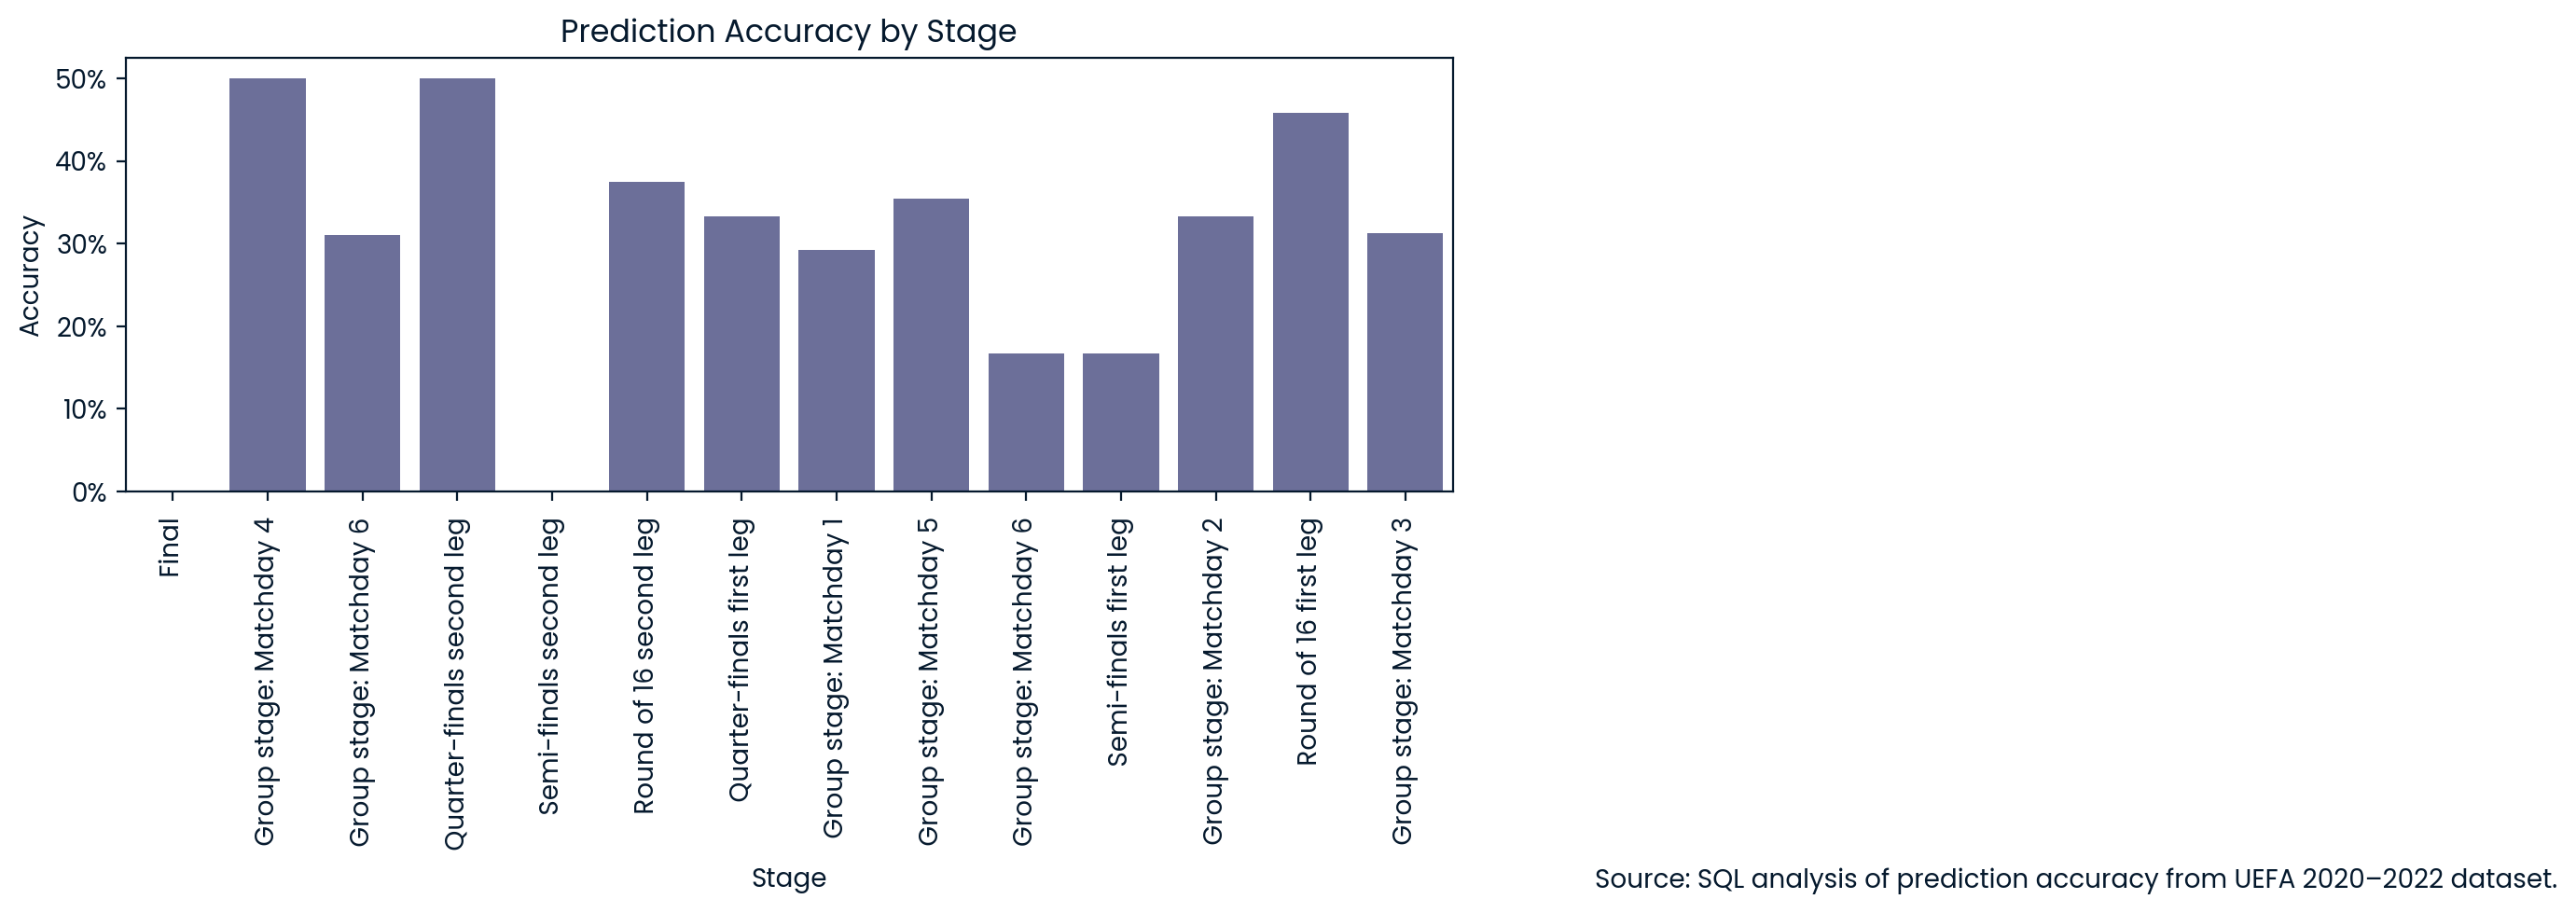

In [46]:
plt.figure(figsize = (8, 5))
sns.barplot(data = win_probability_accuracy_stage, x = 'STAGE', y = 'ACCURACY')
plt.title('Prediction Accuracy by Stage')
plt.ylabel('Accuracy')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax = 1))
plt.xlabel('Stage')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.text(15,-0.48,'Source: SQL analysis of prediction accuracy from UEFA 2020–2022 dataset.')
plt.show()

In [25]:
win_probability_accuracy_team.sort_values('ACCURACY', ascending = False).head()

,TEAM_NAME,TOTAL_MATCHES,CORRECT_PREDICTIONS,ACCURACY
0,Salzburg,6,5,0.833
1,Ä°stanbul BaÅŸakÅŸehir,6,5,0.833
2,FerencvÃ¡ros,6,5,0.833
3,Marseille,6,5,0.833
4,Dynamo Kyiv,6,5,0.833


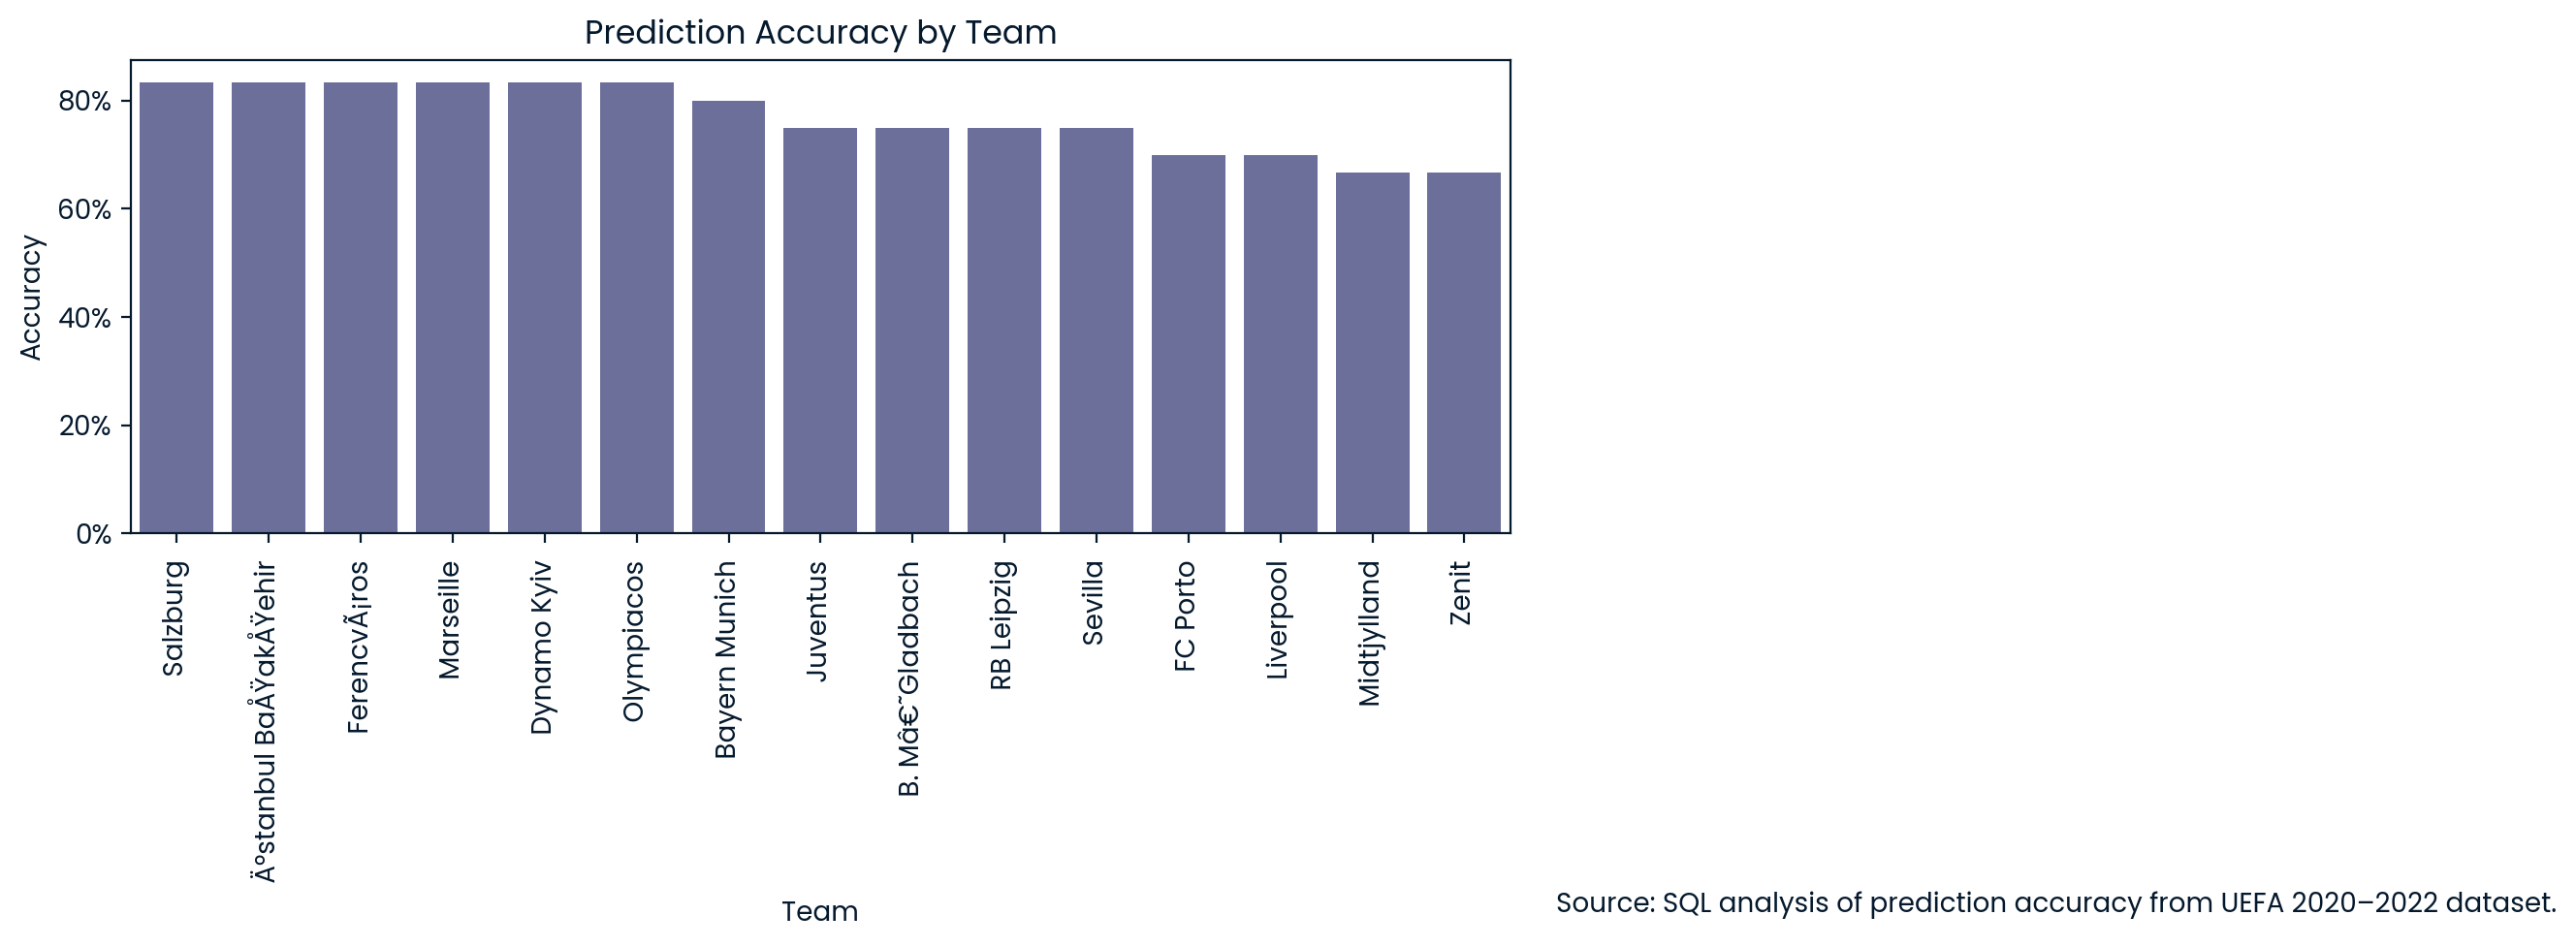

In [50]:
plt.figure(figsize = (8, 5))
sns.barplot(data = win_probability_accuracy_team, x = 'TEAM_NAME', y = 'ACCURACY')
plt.title('Prediction Accuracy by Team')
plt.ylabel('Accuracy')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.xlabel('Team')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.text(15,-0.7,'Source: SQL analysis of prediction accuracy from UEFA 2020–2022 dataset.')
plt.show()

### Insight Summary: Win Probability Accuracy Tracker
**By Stage**
- The prediction model was most accurate in earlier group stage rounds and quarter-finals, reaching 50%.
- Performance dropped sharply in the semis and final, with 0% accuracy in some stages.
- This suggests the model struggles in high-stakes, unpredictable matches.

**By Team (Top Performers)**
- The model predicted matches involving lesser-known or lower-seeded teams (e.g., Ferencváros, Başakşehir) more accurately.
- Accuracy remained high (~70–75%) for top clubs like Liverpool and Sevilla, but lower than for smaller clubs — suggesting some bias or unpredictability in bigger games.
- The model performed best with teams that likely followed more consistent patterns.